# Librairie `pandas` & `matplotlib`

<div class="alert alert-block alert-danger">
    Si vous utilisez ce notebook via mybinder, pensez à télécharger votre fichier à la fin de la séance afin de conserver une trace de votre travail !
</div>

## À la découverte des planètes extrasolaires

Le fichier [`planets.csv`](https://raw.githubusercontent.com/xgarrido/master_python_teaching/master/td/data/planets.csv) contient des informations relatives aux planètes extrasolaires depuis la première "découverte" en 1989. Le document fait notamment référence aux techniques de découverte de ces objets et recense les informations glanées par leurs découvreurs : période orbitale en jours, masse de la planète, distance à l'objet en années lumières et année de découverte. Dans cet exercice, on utilisera le module `pandas` plus à même de traiter des fichiers de données mélant données numériques et alphanumériques.

- Après avoir lu le fichier, afficher un premier résumé des propriétés statistiques du fichier.

- Faire de même en ayant au préalable regroupé les données par méthode de détection.

- Représenter le nombre de planètes découvertes en fonction du temps.

- Représenter cette même information en fonction de la méthode utilisée pour la découverte.

-  Pour les deux principales méthodes, représenter la variation de la période orbitale en fonction
   de la distance à la planète. Finalement, ajouter à la figure précédente, deux sous-figures,
   présentant les distributions de période orbitale et de distance pour chacune des deux
   méthodes. Les trois représentations doivent figurer sur la même figure et conclure quant aux
   caractéristiques des objets extrasolaires mis en évidence par chacune des deux méthodes.

---

## *Iris setosa, Iris virginica et Iris versicolor*

Le jeu de données *Iris* contient les propriétés morphologiques de 3 espèces de fleur d'iris collectées par Edgar Anderson. Ce jeu de données est surtout reputé par l'utilisation faite en 1936 par Ronald Fisher pour démontrer la puissance de son algorithme d'analyse discriminante linéaire à même de séparer les 3 espèces de fleur d'iris. Ces données sont devenues depuis un cas typique pour de nombreuses techniques de classification automatique en *machine learning*.

- Télécharger le fichier [`iris.csv`](https://raw.githubusercontent.com/xgarrido/master_python_teaching/master/td/data/iris.csv). Charger ce fichier dans un `pandas.DataFrame` et créer une
  nouvelle colonne associant la variété d'iris à une couleur (0, 1, 2 ou `red, green, blue` ou ...)

- Représenter les distributions normalisées de longueur et de largeur des sépales et des pétales
  pour les 3 espèces

-  Représenter dans un diagramme (largeur des sépales *vs.* longueur des sépales), la largeur des pétales ainsi que l'espèce de fleur d'iris considérée

- Représenter l'ensemble des combinaisons possibles de données (largeur des sépales /vs./ longueur
  des sépales, largeur des sépales /vs./ largeur des pétales...), les figures situées dans la
  diagonale devant correspondre aux distributions normalisées des différentes grandeurs.

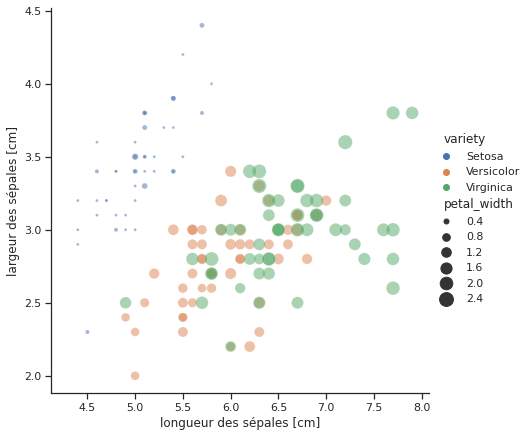

In [101]:
import seaborn as sns

sns.set_theme(style="ticks")

iris = pd.read_csv("./data/iris.csv")

g = sns.relplot(
    data=iris,
    x="sepal_length",
    y="sepal_width",
    hue="variety",
    size="petal_width",
    alpha=0.5,
    sizes=(0, 200),
    height=6,
)
g.set(xlabel="longueur des sépales [cm]", ylabel="largeur des sépales [cm]");

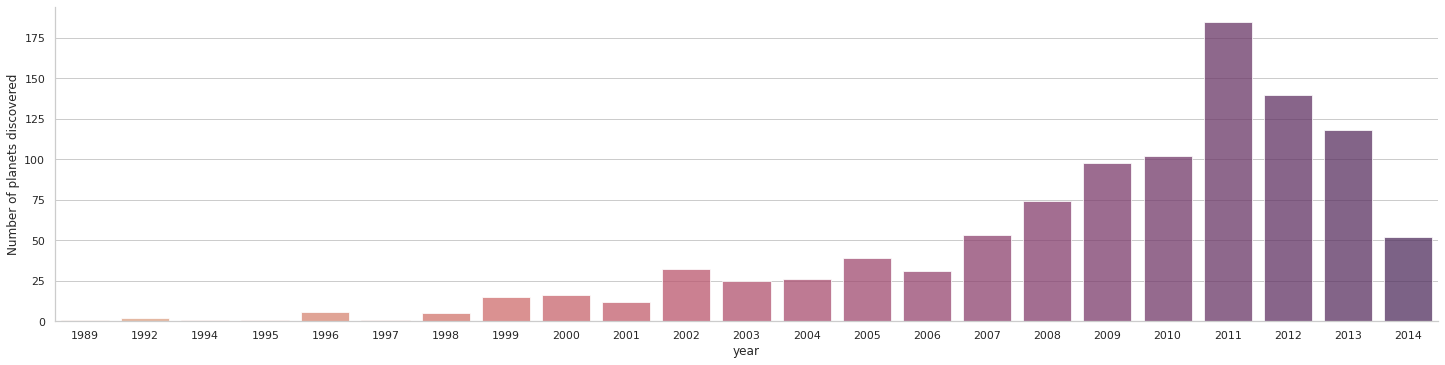

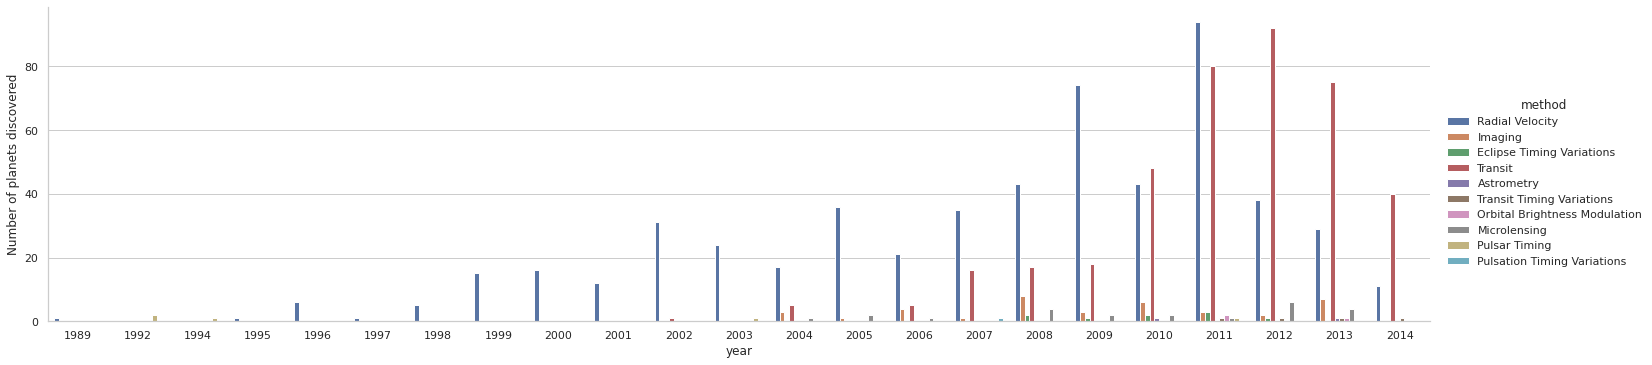

In [99]:
import seaborn as sns

sns.set_theme(style="whitegrid")

g = sns.catplot(x="year", data=planets, aspect=4, kind="count", palette="flare", alpha=0.75)
g.set_ylabels("Number of planets discovered");
g = sns.catplot(x="year", data=planets, aspect=4, kind="count", hue="method")
g.set_ylabels("Number of planets discovered");

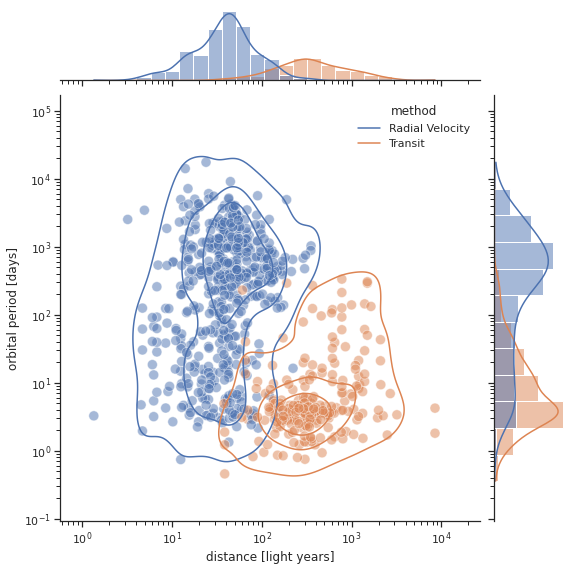

In [100]:
with sns.axes_style("ticks"):
    g = sns.JointGrid(
        data=planets[planets["method"].isin(["Radial Velocity", "Transit"])],
        x="distance",
        y="orbital_period",
        hue="method",
        height=8,
    )
    g.ax_joint.set(
        xscale="log", yscale="log", xlabel="distance [light years]", ylabel="orbital period [days]"
    )
    g.plot_joint(sns.scatterplot, alpha=0.5, s=100)
    g.plot_joint(sns.kdeplot, levels=4)
    g.plot_marginals(sns.histplot, kde=True)